In [7]:
pip install caer --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install canaro --user

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import cv2 as cv
import numpy as np
import caer
import canaro
import gc
import sklearn.model_selection as skm

In [10]:
people = ['Mridul','Sarthak','Vadiraj','Soham']
channels = 1
char_path = r'D:\Face Recognition'

In [11]:
train = caer.preprocess_from_dir(char_path, people,channels=channels,IMG_SIZE=(200,200),isShuffle=True)

len(train)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - Mridul
2 - Mridul
3 - Mridul
4 - Mridul
5 - Mridul
6 - Mridul
7 - Mridul
8 - Mridul
9 - Mridul
10 - Mridul
11 - Mridul
12 - Mridul
13 - Mridul
14 - Mridul
15 - Mridul
16 - Mridul
17 - Mridul
18 - Mridul
19 - Mridul
20 - Mridul
21 - Mridul
22 - Mridul
23 - Mridul
24 - Mridul
25 - Mridul
26 - Mridul
27 - Mridul
28 - Mridul
29 - Mridul
30 - Mridul
31 - Mridul
32 - Mridul
33 - Mridul
34 - Mridul
35 - Mridul
36 - Mridul
37 - Mridul
38 - Mridul
39 - Mridul
40 - Mridul
41 - Mridul
42 - Mridul
43 - Mridul
44 - Mridul
45 - Mridul
46 - Mridul
47 - Mridul
48 - Mridul
49 - Mridul
50 - Mridul
51 - Mridul
52 - Mridul
53 - Mridul
54 - Mridul
55 - Mridul
56 - Mridul
57 - Mridul
58 - Mridul
59 - Mridul
60 - Mridul
61 - Mridul
62 - Mridul
63 - Mridul
64 - Mridul
65 - Mridul
66 - Mridul
67 - Mridul
68 - Mridul
69 - Mridul
70 - Mridul
71 - Mridul
72 - Mridul
73 - Mridul
74 - Mridul
75

400

In [12]:
featureSet , labels = caer.sep_train(train,IMG_SIZE=(200,200))

from tensorflow.keras.utils import to_categorical
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(people))

split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [13]:
del train
del featureSet
del labels
gc.collect()

58

In [14]:
BATCH_SIZE = 16
EPOCHS=3

datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

model = canaro.models.createSimpsonsModel(IMG_SIZE=(200,200), channels=channels, output_dim=len(people),
                                          loss='binary_crossentropy', decay=1e-6, learning_rate=0.001, momentum=0.9, nesterov=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)       

In [15]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [33]:
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/3
20/20 [==============================] - 51s 3s/step - loss: 0.2332 - accuracy: 0.8375 - val_loss: 0.0469 - val_accuracy: 0.9875
Epoch 2/3
20/20 [==============================] - 53s 3s/step - loss: 0.1632 - accuracy: 0.9219 - val_loss: 0.1304 - val_accuracy: 0.9750
Epoch 3/3
20/20 [==============================] - 52s 3s/step - loss: 0.1400 - accuracy: 0.9219 - val_loss: 0.1577 - val_accuracy: 0.9750


In [42]:
cap = cv.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,50)

while True:
    success, img = cap.read()
    break

cap = cv.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,50)

while True:
    success, img = cap.read()
    cv.imshow("Video",img)
    if cv.waitKey(1) & 0xFF ==ord('q'):
        break

In [43]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (200, 200))
    img = caer.reshape(img, (200, 200), 1)
    return img
predictions = model.predict(prepare(img))

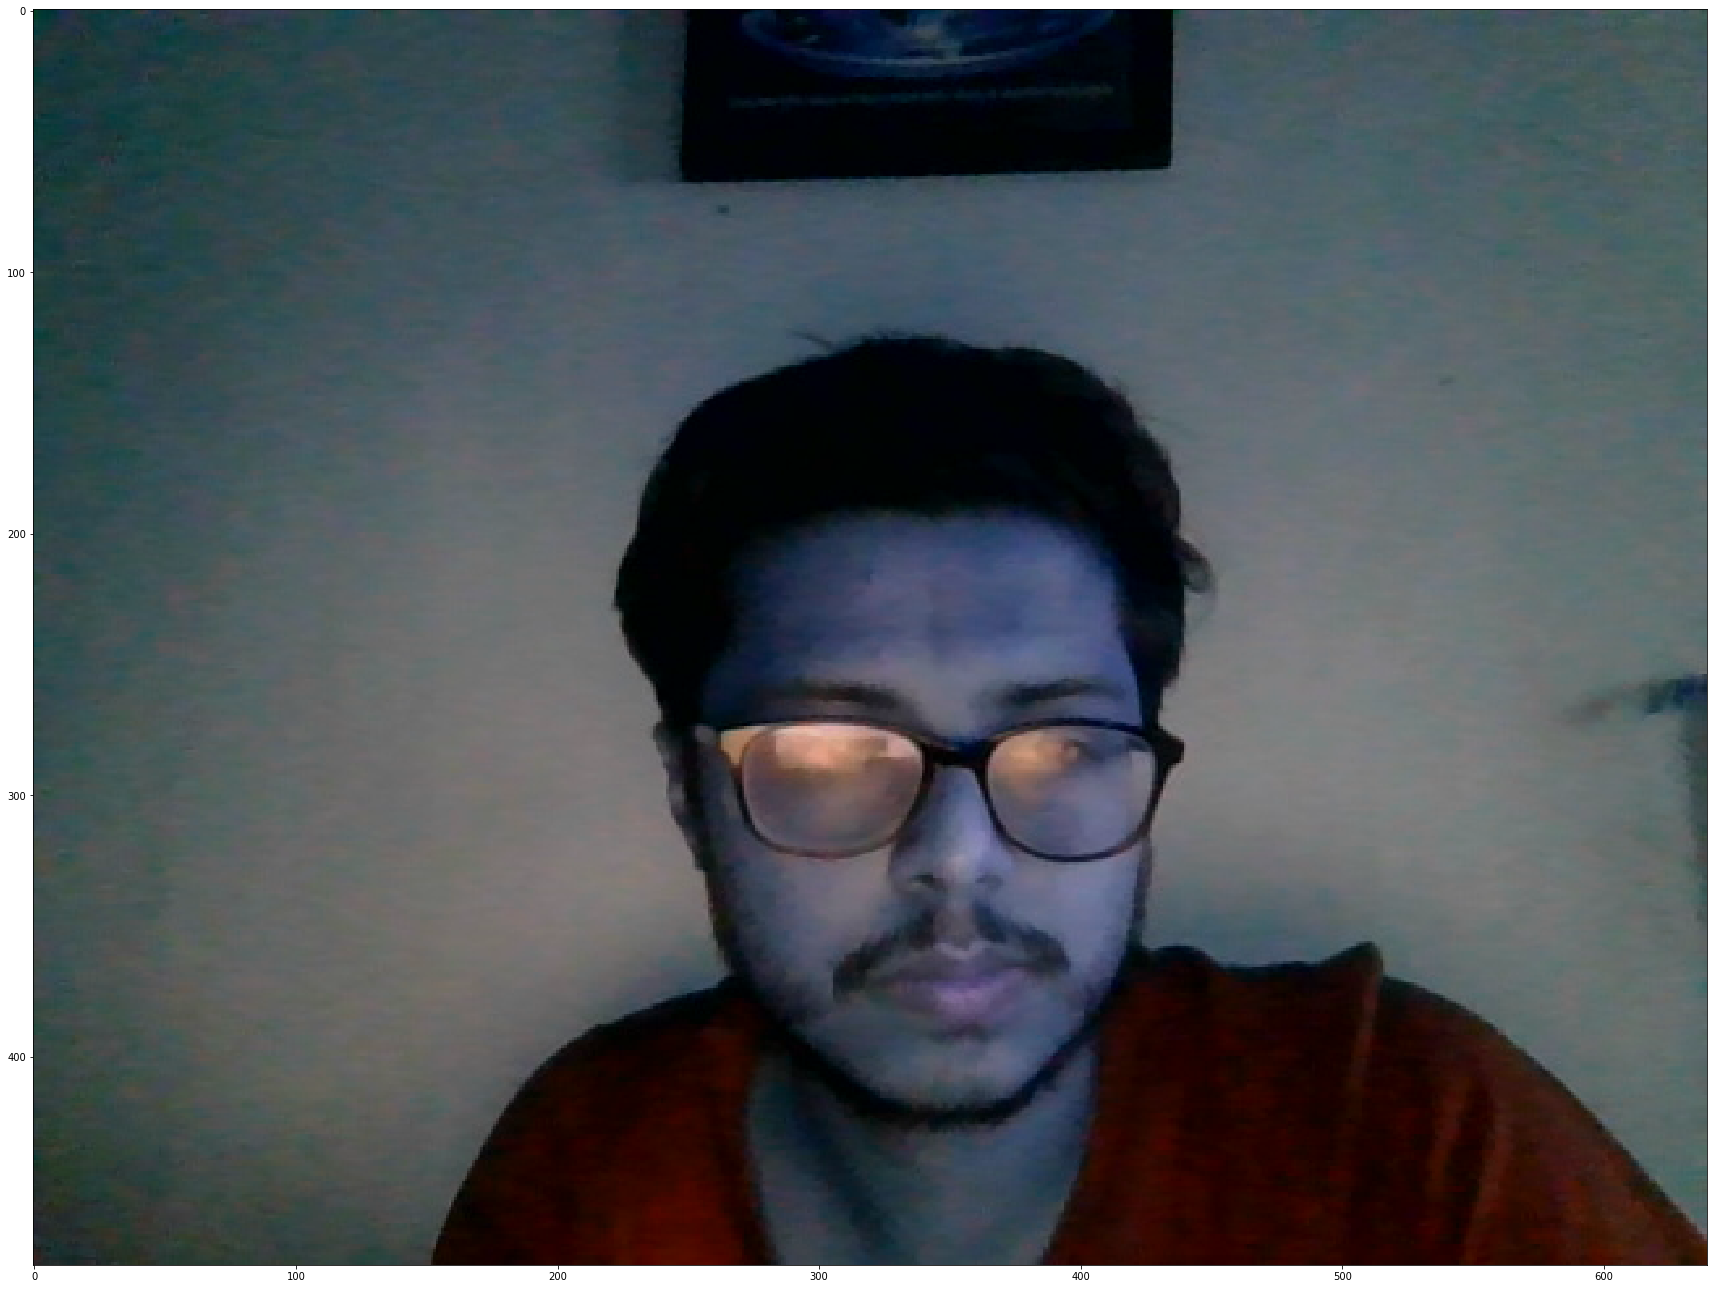

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()

In [45]:
print(people[np.argmax(predictions)])

Vadiraj


In [46]:
import csv
def MarkAttendance(name):
    with open(r"C:\Users\Vadiraj Rao\PycharmProjects\OpencvPython\Resources\EntryData.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow([people.index(name),name]) 

MarkAttendance(people[np.argmax(predictions)]) 